In [17]:
% matplotlib inline

import seaborn as sns
import pandas as pd
import nibabel as nib, numpy as np
import matplotlib.pyplot as plt
import utils.plotting_lighterbg as plot

sns.set_style('white')

### keep for later

In [12]:
yerkes_dir = '/nobackup/hunte1/sabine/data/macaque/Yerkes19/'
data_dir = '/home/raid3/oligschlager/workspace/tractdist/data'

In [13]:
df_regionwise = pd.read_pickle('%s/df_regionwise.pkl' % data_dir)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


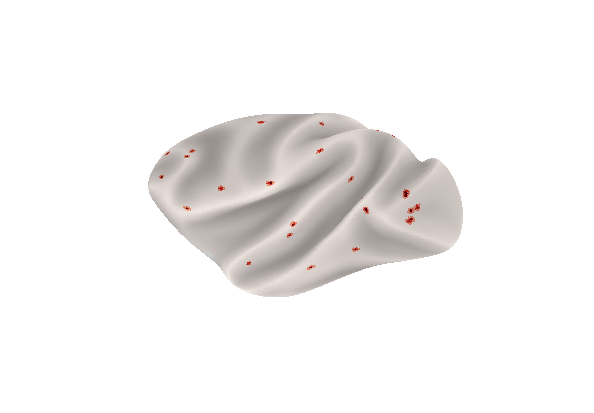

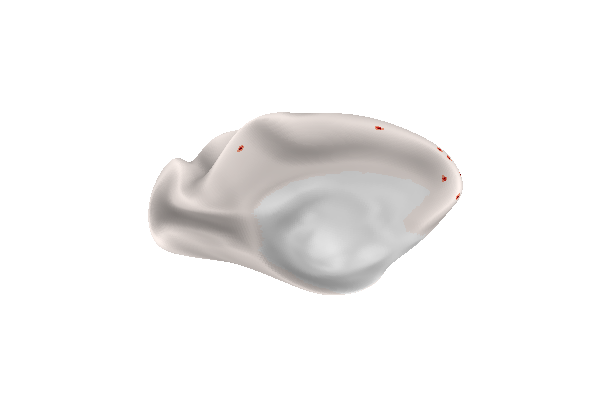

In [18]:
# to keep

# viz injection sites
sns.set_style('white')
sns.set_context('talk')

# macaque surface
f_surf = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/spec/MacaqueYerkes19.L.very_inflated.32k_fs_LR.surf.gii' % yerkes_dir
coords = nib.load(f_surf).darrays[0].data
faces = nib.load(f_surf).darrays[1].data
surf = tuple((coords, faces))
f_sulc = '%s/Donahue_et_al_2016_Journal_of_Neuroscience_W336/spec/MacaqueYerkes19.sulc.32k_fs_LR.dscalar.nii' % yerkes_dir
sulc = nib.load(f_sulc).get_data().squeeze()[:32492]

# labels
mwall = np.load('%s/medial_wall.lh.label.npy' % yerkes_dir)
cort = np.array([node for node in range(32492) if node not in mwall])

# viz
data = np.zeros((32492))
for i in df_regionwise[~df_regionwise['injection sites'].isnull()].index:
    nodes = [int(n) for n in df_regionwise['injection sites'].iloc[i]]
    data[nodes] = 1

for azim in [180,0]:
    img = plot.plot_surf_stat_map(coords, faces, data, 
                                  bg_map=sulc, bg_on_stat=True,
                                  mask=cort, 
                                  azim=azim,
                                  cmap='Reds',
                                  vmin=0, vmax=1)
    plt.show()